In [3]:
#Prosjektoppgave - Marlen


In [102]:
# Del a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Lese inn excel-filen
data = pd.read_excel("support_uke_24.xlsx") 

#Lagre data fra kolonnene i arrays
u_dag = data['Ukedag'].values           #Kolonne 1
kl_slett = data['Klokkeslett'].values   #Kolonne 2
varighet = data['Varighet'].values      #Kolonne 3
score = data['Tilfredshet'].values      #Kolonne 4



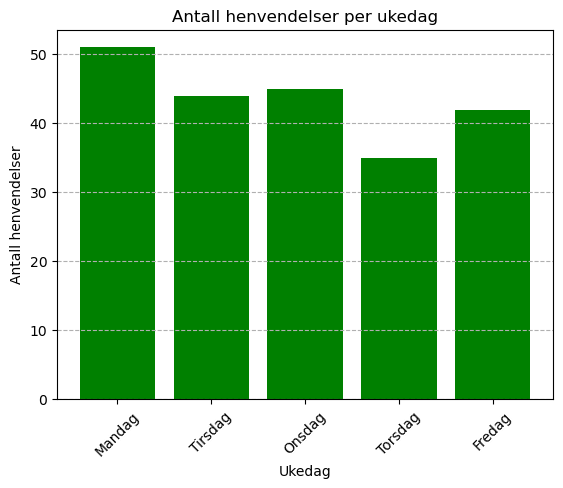

In [48]:
# Del b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Lese inn excel-filen
data = pd.read_excel("support_uke_24.xlsx") 

#Beregne antall hendelser per ukedag 
henvendelser_per_ukedag = data['Ukedag'].value_counts()

#Definere riktig rekkefølge på dagene
riktig_rekkefolge = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']
henvendelser_per_ukedag = henvendelser_per_ukedag.reindex(riktig_rekkefolge)

# Visualisere med søylediagram
plt.bar(henvendelser_per_ukedag.index, henvendelser_per_ukedag.values, color='green')
plt.title('Antall henvendelser per ukedag')
plt.xlabel('Ukedag')
plt.ylabel('Antall henvendelser')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Vise diagrammet
plt.show()



In [52]:
# Del c

import pandas as pd

#Lese inn excel-filen
data = pd.read_excel("support_uke_24.xlsx") 

varighet = data['Varighet'].values

# Finne minste og lengste samtaletid
min_varighet = varighet.min()
max_varighet = varighet.max()

#Skrive svaret til skjerm med informativ tekst
print(f"Den korteste samtaletiden for uke 24 er {min_varighet} minutter/sekunder.")
print(f"Den lengste samtaletiden for uke 24 er {max_varighet} minutter/sekunder.")

Den korteste samtaletiden for uke 24 er 00:00:59 minutter/sekunder.
Den lengste samtaletiden for uke 24 er 00:11:28 minutter/sekunder.


In [15]:
# Del d KREVENDE

???


C:\Users\Bruker


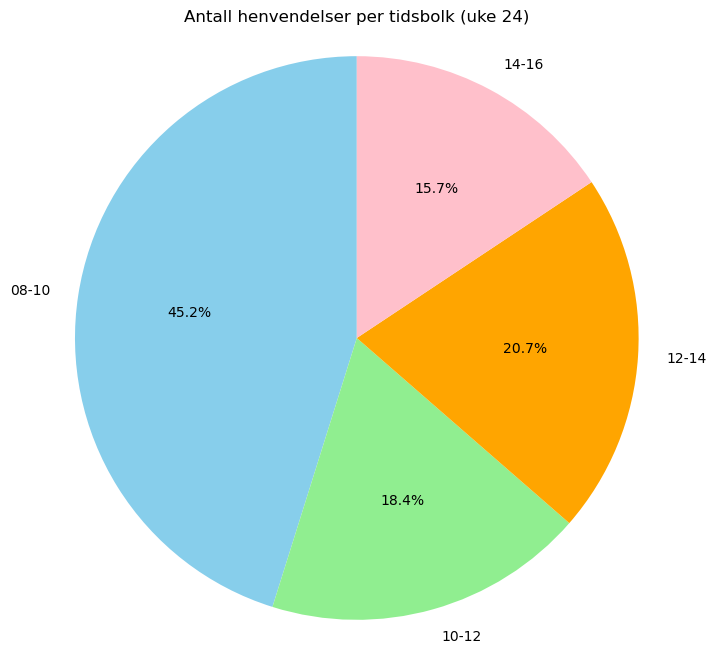

In [98]:
# Del e

import pandas as pd
import matplotlib.pyplot as plt

# Lese inn excel-filen
data = pd.read_excel("support_uke_24.xlsx") 

# Konverter kolonnen 'Klokkeslett' til format (timer, minutter, sekunder)
data['Tidspunkt'] = pd.to_datetime(data['Klokkeslett'], format='%H:%M:%S', errors='coerce').dt.time

# Klassifisere tidspunkter
def klassifiser_tidspunkt(tid):
    if '08:00:00' <= str(tid) < '10:00:00':
        return '08-10'
    elif '10:00:00' <= str(tid) < '12:00:00':
        return '10-12'
    elif '12:00:00' <= str(tid) < '14:00:00':
        return '12-14'
    elif '14:00:00' <= str(tid) < '16:00:00':
        return '14-16'
    return 'Utenfor tidsbolker'

# Klassifiser tidspunkter i tidsbolker og beregn antall henvendelser per bolk
data['Tidsbolk'] = data['Tidspunkt'].apply(klassifiser_tidspunkt)
henvendelser_per_tidsbolk = data['Tidsbolk'].value_counts().reindex(['08-10', '10-12', '12-14', '14-16'], fill_value=0)

# Lage kakediagram
plt.figure(figsize=(8, 8))
plt.pie(
    henvendelser_per_tidsbolk.values,
    labels=henvendelser_per_tidsbolk.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'orange', 'pink']
)
plt.title('Antall henvendelser per tidsbolk (uke 24)')
plt.axis('equal')
plt.show()

In [150]:
# Del f

import pandas as pd
import matplotlib.pyplot as plt

# Lese inn excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Lagre data fra kolonne "Tilfredshet" og filtrerer ut rader der det ikke er angitt
tilfredshet = data['Tilfredshet'].dropna().values

# Beregne antall positive, negative og nøytrale svar basert på NPS
positive_svar = len([score for score in tilfredshet if score >= 9])
negative_svar = len([score for score in tilfredshet if score <= 6])
nøytrale_svar = len([score for score in tilfredshet if score == 7 or score == 8])
total = len(tilfredshet)

# Beregn prosentandeler
prosent_positive = (positive_svar / total) * 100
prosent_negative = (negative_svar / total) * 100

# Beregn NPS
NPS = prosent_positive - prosent_negative

print(f"Supportavdelingens NPS-score (%) er: {NPS:.2f}")


Supportavdelingens NPS-score (%) er: 41.86
